# 1. Import necessary libraries

In [1]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 2. Load Dataset

In [2]:
book_data = pd.read_csv('book.csv', encoding='latin-1',index_col=0)
book_data.head()

,User.ID,Book.Title,Book.Rating
1,276726,Classical Mythology,5
2,276729,Clara Callan,3
3,276729,Decision in Normandy,6
4,276736,Flu: The Story of the Great Influenza Pandemic...,8
5,276737,The Mummies of Urumchi,6


# 3. Data Understanding

In [134]:
book_data.shape

(10000, 3)

In [ ]:
book_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [ ]:
book_data['User.ID'].nunique()

2182

In [ ]:
book_data['User.ID'].unique()

array([276726, 276729, 276736, ..., 162113, 162121, 162129], dtype=int64)

In [ ]:
book_data[book_data['User.ID']==8]

,User.ID,Book.Title,Book.Rating
2400,8,Ancient Celtic Romances,5
2401,8,The Western way: A practical guide to the West...,5
2402,8,Wings,5
2403,8,Truckers,5
2404,8,Keepers of the Earth Teachers Guide,6
2405,8,The Celts Activity Book,6
2406,8,The Art Of Celtia,7


In [ ]:
book_data['Book.Title'].nunique()

9659

In [ ]:
book_data['Book.Title'].unique()

array(['Classical Mythology', 'Clara Callan', 'Decision in Normandy', ...,
       'How to Flirt: A Practical Guide', 'Twilight',
       'Kids Say the Darndest Things'], dtype=object)

In [ ]:
avg=book_data.groupby('Book.Title')['Book.Rating'].mean()
avg

Book.Title
 Jason, Madison &amp                                                       8.0
 Other Stories;Merril;1985;McClelland &amp                                 6.0
 Repairing PC Drives &amp                                                  4.0
'48                                                                        7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      8.0
                                                                          ... 
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    8.0
\Well, there's your problem\: Cartoons                                     9.0
iI Paradiso Degli Orchi                                                    7.0
stardust                                                                   5.0
Ã?Â?bermorgen.                                                             4.0
Name: Book.Rating, Length: 9659, dtype: float64

In [ ]:
count=book_data.groupby('Book.Title')['Book.Rating'].count()
count

Book.Title
 Jason, Madison &amp                                                       1
 Other Stories;Merril;1985;McClelland &amp                                 1
 Repairing PC Drives &amp                                                  1
'48                                                                        1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities      1
                                                                          ..
\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character    1
\Well, there's your problem\: Cartoons                                     1
iI Paradiso Degli Orchi                                                    1
stardust                                                                   1
Ã?Â?bermorgen.                                                             1
Name: Book.Rating, Length: 9659, dtype: int64

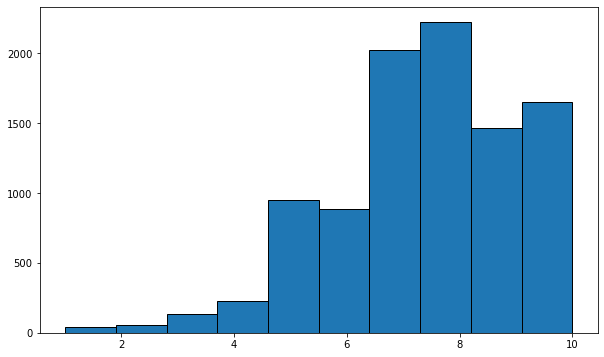

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(avg,bins=10,edgecolor='black')
plt.show()

In [ ]:
# plt.figure(figsize=(10,6))
# book_data['Book.Rating'].hist(bins=10,grid=False,edgecolor='black')
# plt.show()

# UBCF using :

## 1. Cosine Similarity

In [3]:
ubcf_pivot = pd.pivot_table(data = book_data, values='Book.Rating', index='User.ID', columns='Book.Title').fillna(0)

In [4]:
ubcf_pivot

Book.Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [5]:
cosine_dist = 1-pairwise_distances(X = ubcf_pivot, metric = 'cosine')
cosine_dist

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [6]:
cosine_dist_df = pd.DataFrame(cosine_dist,index=ubcf_pivot.index,columns=ubcf_pivot.index)
cosine_dist_df

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Nullifying diagonal values as they are same users

In [7]:
np.fill_diagonal(cosine_dist, 0)
cosine_dist_df = pd.DataFrame(cosine_dist,index=ubcf_pivot.index,columns=ubcf_pivot.index)
cosine_dist_df

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Finding similar users

In [8]:
pd.DataFrame(cosine_dist_df.idxmax(axis=1))

,0
User.ID,
8,8
9,8
10,8
12,8
14,8
...,...
278846,8
278849,8
278851,278202


In [9]:
cosine_dist_df.loc[19,278418]

0.08704569738537926

In [10]:
cosine_dist_df.loc[278851,278202]

0.023463636182787573

In [11]:
cosine_dist_df.loc[53,1996]

0.12542944911781295

## Common books read by user IDs '53' & '1996'

In [12]:
book_data[book_data['User.ID']==53]

,User.ID,Book.Title,Book.Rating
2428,53,Sick Puppy,3
2429,53,Reliquary,10
2430,53,Turning Thirty,6
2431,53,Prey,9


In [13]:
book_data[book_data['User.ID']==1996]

,User.ID,Book.Title,Book.Rating
4590,1996,Sick Puppy,8
4591,1996,"CSI, Miami: Heat Wave",7
4592,1996,Tempting the Heiress,7


In [14]:
book_data[(book_data['User.ID']==53)|(book_data['User.ID']==1996)]

,User.ID,Book.Title,Book.Rating
2428,53,Sick Puppy,3
2429,53,Reliquary,10
2430,53,Turning Thirty,6
2431,53,Prey,9
4590,1996,Sick Puppy,8
4591,1996,"CSI, Miami: Heat Wave",7
4592,1996,Tempting the Heiress,7


## 2. Euclidean Distance

In [17]:
euclidean_dist = pd.DataFrame(pairwise_distances(X = ubcf_pivot, metric = 'euclidean'),index=ubcf_pivot.index,columns=ubcf_pivot.index).round(2)
euclidean_dist

User.ID,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
User.ID,,,,,,,,,,,,,,,,,,,,,
8,0.00,16.03,16.03,17.92,17.52,17.38,18.44,16.43,16.43,20.05,...,17.92,22.83,16.88,37.85,18.49,16.88,17.38,29.05,16.88,22.74
9,16.03,0.00,8.49,11.66,11.05,10.82,12.45,9.22,9.22,14.73,...,11.66,18.33,10.00,35.33,12.53,10.00,10.82,25.67,10.00,18.22
10,16.03,8.49,0.00,11.66,11.05,10.82,12.45,9.22,9.22,14.73,...,11.66,18.33,10.00,35.33,12.53,10.00,10.82,25.67,10.00,18.22
12,17.92,11.66,11.66,0.00,13.64,13.45,14.80,12.21,12.21,16.76,...,14.14,20.00,12.81,36.22,14.87,12.81,13.45,26.89,12.81,19.90
14,17.52,11.05,11.05,13.64,0.00,12.92,14.32,11.62,11.62,16.34,...,13.64,19.65,12.25,36.03,14.39,12.25,12.92,26.63,12.25,19.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,16.88,10.00,10.00,12.81,12.25,12.04,13.53,10.63,10.63,15.65,...,12.81,19.08,11.31,35.72,13.60,0.00,12.04,26.21,11.31,18.97
278849,17.38,10.82,10.82,13.45,12.92,12.73,14.14,11.40,11.40,16.19,...,13.45,19.52,12.04,35.96,14.21,12.04,0.00,26.53,12.04,19.42
278851,29.05,25.67,25.67,26.89,26.63,26.53,27.24,25.92,25.92,28.35,...,26.89,30.38,26.21,42.84,27.28,26.21,26.53,0.00,26.21,30.32


In [20]:
pd.DataFrame(eucledian_dist.idxmin(axis=1))

,0
User.ID,
8,8
9,9
10,10
12,12
14,14
...,...
278846,278846
278849,278849
278851,278851


In [18]:
euclidean_dist.loc[53,1996]

18.44

In [19]:
euclidean_dist.loc[276762,276726]

11.79

## Books ready for recommendation

In [21]:
book_data[(book_data['User.ID']==53)|(book_data['User.ID']==1996)]

,User.ID,Book.Title,Book.Rating
2428,53,Sick Puppy,3
2429,53,Reliquary,10
2430,53,Turning Thirty,6
2431,53,Prey,9
4590,1996,Sick Puppy,8
4591,1996,"CSI, Miami: Heat Wave",7
4592,1996,Tempting the Heiress,7
